In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import collections
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import ipywidgets as widgets
plotly.tools.set_credentials_file(username='aeneasin', api_key='FgquRu8CvjIYTRq9iZ04')
dataset = pd.read_csv("DiscGrants96to13.csv",encoding='iso-8859-1')
year = dataset["FiscalYear"]

Here is the preparation part. In this part, user could select the range of year they want to see.

In [2]:
#Preparation Part
yo = widgets.IntRangeSlider(
    value=[min(year), max(year)],
    min=min(year),
    max=max(year),
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white',
    color='black'
)
yo

We find that there are some abnormal states. And we would clean them.

In [3]:
states=collections.Counter(dataset["InstState"])
statedic = states.items()
stateorder = sorted(statedic, key=lambda statedic : statedic[1])

In [4]:
stateorder

[('MH', 1),
 ('AS', 1),
 ('MP', 2),
 ('FM', 2),
 (nan, 2),
 ('PW', 3),
 ('GU', 3),
 ('VI', 10),
 ('PR', 20),
 ('WV', 27),
 ('ID', 47),
 ('MS', 50),
 ('AR', 51),
 ('DE', 58),
 ('WY', 62),
 ('RI', 64),
 ('ND', 83),
 ('HI', 89),
 ('SC', 89),
 ('VT', 91),
 ('AL', 95),
 ('NJ', 97),
 ('NH', 102),
 ('KY', 116),
 ('KS', 125),
 ('LA', 127),
 ('GA', 128),
 ('IA', 128),
 ('NE', 137),
 ('UT', 137),
 ('SD', 139),
 ('DC', 144),
 ('IN', 152),
 ('TN', 159),
 ('MO', 174),
 ('NV', 177),
 ('ME', 203),
 ('MT', 221),
 ('MN', 222),
 ('CT', 230),
 ('CO', 234),
 ('OR', 241),
 ('MD', 243),
 ('OH', 260),
 ('VA', 265),
 ('NC', 267),
 ('AZ', 302),
 ('WI', 313),
 ('NM', 320),
 ('FL', 324),
 ('TX', 393),
 ('MI', 427),
 ('IL', 443),
 ('OK', 488),
 ('WA', 506),
 ('MA', 528),
 ('PA', 531),
 ('AK', 948),
 ('NY', 1010),
 ('CA', 1407)]

This is abnormal because the US only have 50 states and Washington DC. So the length should be 51. Then we find the abnomral states.

In [5]:
len(stateorder)

60

In [6]:
dirty=[]
for i in range(9):
    dirty.append(stateorder[i][0])

In [7]:
for i in range(len(dirty)):
    dataset = dataset[(dataset["InstState"]==dirty[i])==False]

We finish our cleaning and find the length of states now is normal(including NULL part)

In [8]:
states=collections.Counter(dataset["InstState"])
statedic = states.items()
stateorder = sorted(statedic, key=lambda statedic : statedic[1])
len(stateorder)

52

In [9]:
user_year = yo.value
year_dataset = dataset[((dataset['FiscalYear'])<=user_year[1])&((dataset['FiscalYear'])>=user_year[0])].reset_index()
user_year

(2000, 2010)

Visualization Part: Distribution of program types

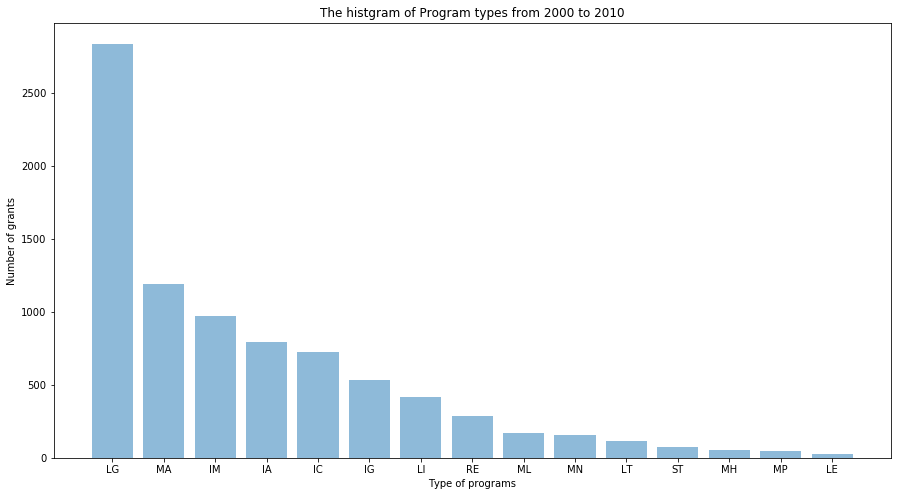

In [10]:
#Visualization for program types
plt.rcParams["figure.figsize"] = (15, 8)
cc=collections.Counter(year_dataset["ProgramType"])
q = cc.items()
p = sorted(q, key=lambda q : q[1], reverse = True)
p_types=[]
p_nums=[]
for i in range(len(p)):
    p_types.append(p[i][0])
    p_nums.append(p[i][1])
plt.bar(range(len(p)), p_nums, align='center', alpha=0.5)
plt.xticks(range(len(p)), p_types)
plt.ylabel('Number of grants')
plt.xlabel('Type of programs')
plt.title('The histgram of Program types from ' + str(user_year[0]) + ' to '+ str(user_year[1]))
 
plt.show()

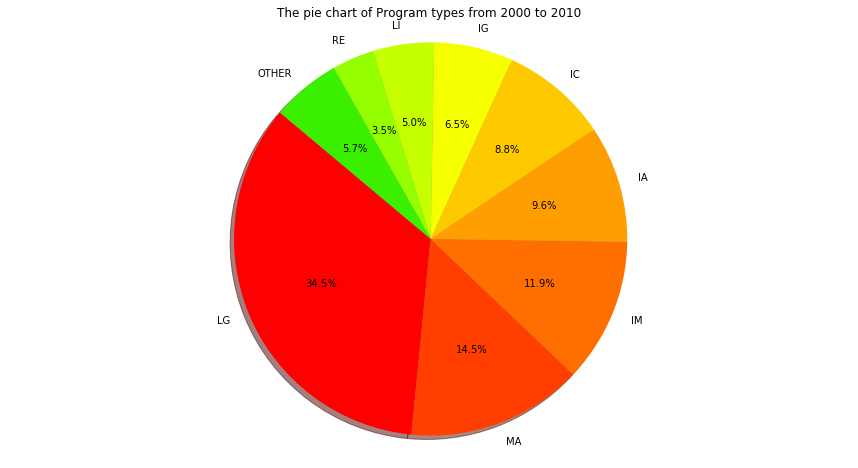

In [11]:
#Generate several colors to make the plot more beautiful
from random import shuffle
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., 200))
colors = colors[20:29]
p_types[0:8].append('Other')
p_types
other_types = p_types[0:8]
other_types.append('OTHER')
other_nums = p_nums[0:8]
other_nums.append(sum(p_nums[9:len(p_nums)]))
plt.pie(other_nums, labels=other_types, autopct='%1.1f%%', shadow=True, colors = colors, startangle=140)
plt.title('The pie chart of Program types from ' + str(user_year[0]) + ' to '+ str(user_year[1]))
plt.axis('equal')
plt.show()

Visualization Part: Grant Distribution on Map

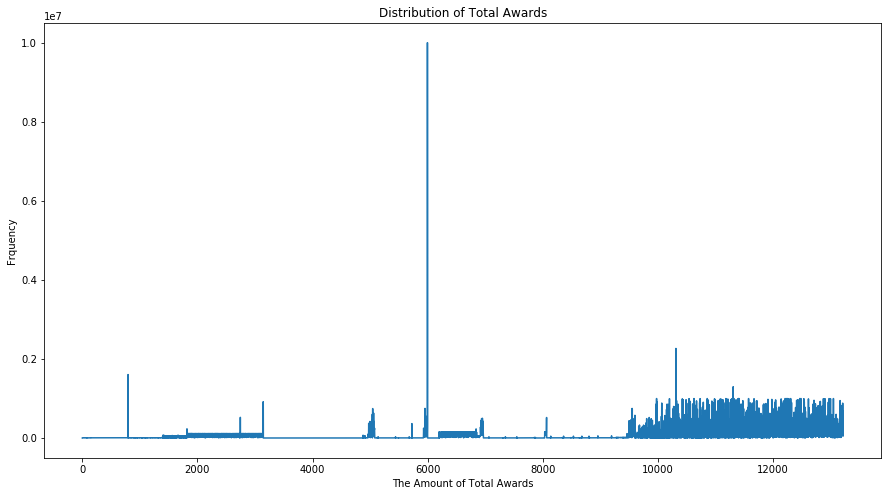

In [12]:
# We first need to know the distribution of total award. This would help us know how to seperate our data.
plt.plot(dataset['AwardTotal'])
plt.title('Distribution of Total Awards')
plt.xlabel('The Amount of Total Awards')
plt.ylabel('Frquency')
plt.show()

In [13]:
sorted(year_dataset['AwardTotal'],reverse = True)

[1606000.0,
 1599901.0,
 999991.0,
 999980.0,
 999940.0,
 999873.0,
 999861.0,
 999860.0,
 999771.0,
 999719.0,
 999558.0,
 999541.0,
 999370.0,
 999363.0,
 999069.0,
 999033.0,
 998556.0,
 997766.0,
 997388.0,
 997099.0,
 996750.0,
 996243.0,
 996236.0,
 995630.0,
 995325.0,
 994610.0,
 994369.0,
 992100.0,
 991311.0,
 991246.0,
 990892.0,
 990234.0,
 990174.0,
 989495.0,
 988543.0,
 988518.0,
 988419.0,
 988355.0,
 981814.0,
 979578.0,
 978617.0,
 974998.0,
 974259.0,
 972839.0,
 972337.0,
 971512.0,
 971407.0,
 969773.0,
 966754.0,
 965555.0,
 964887.0,
 963420.0,
 960595.0,
 955694.0,
 955275.0,
 946396.0,
 946324.0,
 943336.0,
 943090.0,
 943052.0,
 940750.0,
 939618.0,
 936338.0,
 932094.0,
 928142.0,
 928080.0,
 926089.0,
 920000.0,
 919428.0,
 917891.0,
 911809.0,
 910846.0,
 910064.0,
 907352.0,
 906104.0,
 905796.0,
 905030.0,
 901451.0,
 899528.0,
 898195.0,
 889610.0,
 889401.0,
 885598.0,
 883171.0,
 882416.0,
 881692.0,
 878634.0,
 877090.0,
 876278.0,
 872920.0,
 866674.

In [14]:
#because 10000000 would be too big for the remaining data, the existence of it would result in the lose of many details for remaing part. So I delete it.
d_clean = year_dataset[year_dataset['AwardTotal']<10000000]
trace1 = {
  "x": d_clean['ProgramType'],
  "y": d_clean['FiscalYear'], 
  "z": d_clean['AwardTotal'],
  "marker": {
    "color": "rgba(31,119,180,1)", 
    "line": {"color": "transparent"}, 
    "size": 3, 
    "sizemode": "area"
  }, 
  "mode": "markers", 
  "type": "scatter3d"
}
data = Data([trace1])
layout = {
  "margin": {
    "r": 10, 
    "t": 25, 
    "b": 40, 
    "l": 60
  }, 
  "scene": {
    "camera": {"eye": {
        "x": -1.25, 
        "y": 1.25, 
        "z": 1.25
      }}, 
    "xaxis": {
      "showgrid": False, 
      "tickfont": {
        "color": "#ff9999", 
        "family": "Old Standard TT, serif", 
        "size": 14
      }, 
      "title": {
        "color": "lightgrey", 
        "family": "Arial, sans-serif", 
        "size": 18
      }, 
      "titlefont": {
        "color": "lightgrey", 
        "family": "Arial, sans-serif", 
        "size": 18
      }
    }, 
    "yaxis": {
      "showgrid": False, 
      "tickfont": {
        "color": "#ff9999", 
        "family": "Old Standard TT, serif", 
        "size": 14
      }, 
      "title": {
        "color": "lightgrey", 
        "family": "Arial, sans-serif", 
        "size": 18
      }, 
      "titlefont": {
        "color": "lightgrey", 
        "family": "Arial, sans-serif", 
        "size": 18
      }
    }, 
    "zaxis": {
      "showgrid": False, 
      "tickfont": {
        "color": "#ff9999", 
        "family": "Old Standard TT, serif", 
        "size": 14
      }, 
      "title": {
        "color": "lightgrey", 
        "family": "Arial, sans-serif", 
        "size": 18
      }, 
      "titlefont": {
        "color": "lightgrey", 
        "family": "Arial, sans-serif", 
        "size": 18
      }
    }
  }, 
  "title": "3D Scatter plot for Year, Type and Total Awards", 
  "xaxis": {"domain": [0, 1]}, 
  "yaxis": {
    "categoryorder": "array", 
    "domain": [0, 1], 
    "type": "category"
  }
}
fig = Figure(data=data, layout=layout)
py.iplot(fig)

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~aeneasin/0 or inside your plot.ly account where it is named 'plot from API'


In [15]:
[max(dataset['AwardTotal']),min(dataset['AwardTotal'])]

[10000000.0, 715.0]

In [16]:
year_dataset['Text'] = year_dataset['Institution'] + '<br>' + year_dataset['Program'] + '<br>' + 'Program Type: ' + year_dataset['ProgramType'] + '<br>' + 'Total Award: ' + (year_dataset['AwardTotal']/1e3).astype(str)+ ' thousand'
df2 = year_dataset
df2=df2[((df2["InstState"]=="GU")|(df2["InstState"]=="PW")|(df2["InstState"]=="VI")|(df2["InstState"]=="PR")|(df2["InstState"]=="MP")|(df2["InstState"]=="FM")|(df2["InstState"]=="MH")|(df2["InstState"]=="AS")|(df2["InstState"]==""))==False]
year_dataset = df2
limits = [(0,1),(1,10),(10,100),(100,1000),(1000,10000)]
#colors = ["#ffcccc","#ffddcc","#ffeecc","#ffffcc","#eeffcc","#ddffcc"]
colors = ["#ce9248","#a4ce48","#48ce80","#48cace","#4865ce"]
institutions = []
scale = 6000

for i in range(len(limits)):
    subdf2=year_dataset[((year_dataset['AwardTotal']/1e3)<limits[i][1])&((year_dataset['AwardTotal']/1e3)>limits[i][0])]
    institution = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = subdf2['Longitude'],
        lat = subdf2['Latitude'],
        text = subdf2['Text'],
        marker = dict(
            size = subdf2['AwardTotal']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name ='{0} - {1}'.format(limits[i][0],limits[i][1])+'  thousand dollar' )
    institutions.append(institution)

In [17]:
layout = dict(
        title = 'Administrative Discretionary Grants'+ str(user_year[0]) + ' to '+ str(user_year[1]),
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),

    )
    

fig = dict( data=institutions, layout=layout )
py.iplot( fig, validate=False)

In [18]:
limits = p_types
institutions = []
scale = 6000

for i in range(len(limits)):
    subdf2=year_dataset[year_dataset['ProgramType']==limits[i]]
    institution = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = subdf2['Longitude'],
        lat = subdf2['Latitude'],
        text = subdf2['Text'],
        marker = dict(
            size = subdf2['AwardTotal']/scale,
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name =limits[i] )
    institutions.append(institution)

In [20]:
layout = dict(
        title = 'Administrative Discretionary Grants from '+ str(user_year[0]) + ' to '+ str(user_year[1]),
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),

    )
    

fig = dict( data=institutions, layout=layout )
py.iplot( fig, validate=False)